# Convolutional Neural Networks
This notebook will guide you through the use of the `keras` package to train convolutional neural networks for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998.

## Loading the packages

In [2]:
import numpy as np
from matplotlib import pyplot as pl

import tensorflow as tf
from tensorflow import keras as keras
from sklearn import metrics as me

%matplotlib inline

### Load the `mnist` dataset and normalize in the range [0, 1]

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape

X_train = np.expand_dims(X_train, axis=3).astype(np.float32)
X_test = np.expand_dims(X_test, axis=3).astype(np.float32)

X_train /= 255.0
X_test /= 255.0

n_classes = 10

print(n_train, 'train samples')
print(n_test, 'test samples')

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples
(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


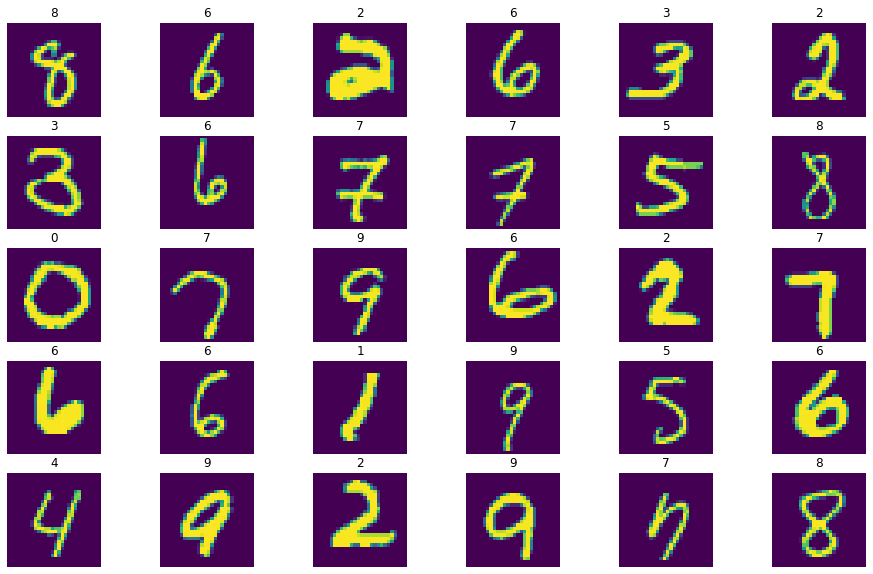

In [4]:
pl.figure(figsize=(16,10))
for i in range(30):
    pl.subplot(5,6,i+1)
    j = np.random.randint(0,X_train.shape[0])
    pl.imshow(X_train[j,:,:,0])
    pl.title(y_train[j])
    pl.axis('off')

### Make sure that the dimension ordering matches the backend (tensorflow)

In [5]:
print(keras.backend.image_data_format())

channels_last


### Create the CNN and show its architecture (Functional API)

In [6]:
l0 = keras.layers.Input(shape=(height, width, 1), name='l0')

l1 = keras.layers.Conv2D(9, (5, 5), padding='same', activation='relu', name='l1')(l0)
l1_mp = keras.layers.MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1)

l2 = keras.layers.Conv2D(9, (5, 5), padding='same', activation='relu', name='l2')(l1_mp)
l2_mp = keras.layers.MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2)

l3 = keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', name='l3')(l2_mp)
l3_mp = keras.layers.MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3)

flat = keras.layers.Flatten(name='flat')(l3_mp)

l4 = keras.layers.Dense(25, activation='relu', name='l4')(flat)

l5 = keras.layers.Dense(n_classes, activation='softmax', name='l5')(l4)

model = keras.models.Model(inputs=l0, outputs=l5)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l0 (InputLayer)             [(None, 28, 28, 1)]       0         
                                                                 
 l1 (Conv2D)                 (None, 28, 28, 9)         234       
                                                                 
 l1_mp (MaxPooling2D)        (None, 14, 14, 9)         0         
                                                                 
 l2 (Conv2D)                 (None, 14, 14, 9)         2034      
                                                                 
 l2_mp (MaxPooling2D)        (None, 7, 7, 9)           0         
                                                                 
 l3 (Conv2D)                 (None, 7, 7, 16)          1312      
                                                                 
 l3_mp (MaxPooling2D)        (None, 3, 3, 16)          0     

### Define some constants and train de CNN

In [7]:
batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(), metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1,
                    validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 49s 103ms/step - loss: 1.9675 - accuracy: 0.3285 - val_loss: 0.9675 - val_accuracy: 0.7076
Epoch 2/10
469/469 [==============================] - 49s 104ms/step - loss: 0.5530 - accuracy: 0.8310 - val_loss: 0.3550 - val_accuracy: 0.8860
Epoch 3/10
404/469 [========================>.....] - ETA: 6s - loss: 0.2902 - accuracy: 0.9111

KeyboardInterrupt: ignored

### Show the performance of the model

Test score: 0.10252483189105988
Test accuracy: 0.9678999781608582


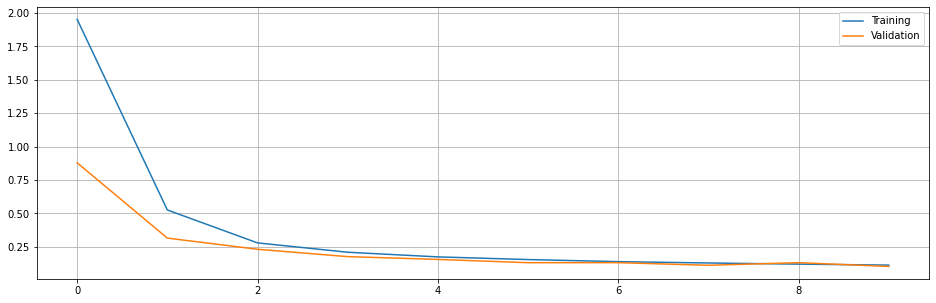

In [ ]:
pl.figure(figsize=(16,5))
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Validation')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

### Confusion matrix

In [ ]:
pred_probas = model.predict_on_batch(X_test)
pred_classes = np.argmax(pred_probas, axis=-1)
me.confusion_matrix(y_test, pred_classes)

array([[ 972,    0,    2,    0,    0,    1,    1,    1,    3,    0],
       [   0, 1122,    3,    1,    0,    0,    1,    1,    7,    0],
       [   6,    3, 1008,    3,    0,    0,    1,    5,    6,    0],
       [   0,    0,   13,  948,    0,   12,    1,   10,   24,    2],
       [   0,    1,    6,    1,  950,    0,    3,    4,    5,   12],
       [   6,    0,    2,    5,    1,  855,    5,    3,   14,    1],
       [  10,    3,    1,    0,    3,    2,  936,    0,    3,    0],
       [   1,    2,    9,    3,    0,    0,    0, 1004,    4,    5],
       [   8,    0,    4,    2,    2,    3,    3,    7,  945,    0],
       [  11,    8,    0,    4,   15,    3,    0,   17,   12,  939]])